<AxesSubplot:xlabel='mortality', ylabel='hardness'>

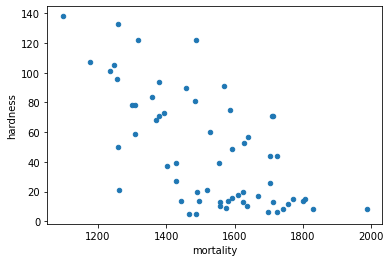

In [12]:
import pandas as pd
data=pd.read_csv('C:/Users/etokarev/OneDrive - Philip Morris International/Desktop/private/Netology/Python/Homework/_18/water.csv')
data.plot(kind='scatter', x='mortality', y='hardness')

In [16]:
# Коэффициент корреляции Пирсона. Корреляция средняя, ближе к сильной
data[['mortality','hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [20]:
# Коэффициент корреляции Спирмана
data[['mortality','hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [46]:
from sklearn.linear_model import LinearRegression
from  sklearn.model_selection import train_test_split
x = data[['mortality']]
y = data['hardness']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=10)

model = LinearRegression()
model.fit(x_train, y_train)

# коэффициенты уравнения линейной регрессии y=kx+b
print('k= ',model.coef_)
print('b= ',model.intercept_)

# коэффициент детерминации= ',
print('коэффициент детерминации= ',model.score(x_test, y_test))


k=  [-0.14788736]
b=  275.5220261316826
коэффициент детерминации=  0.2375104197565966


Коэффициент детерминации очень низкий

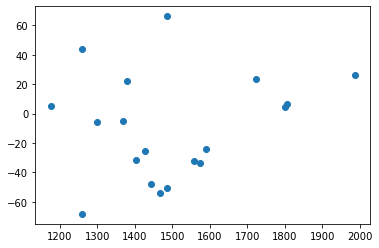

In [68]:
y_pred = model.predict(x_test)

import matplotlib.pyplot as plt

plt.scatter(x=x_test, y=y_test-y_pred)


остатки не совсем  выглядят как случайные

Получается, что есть взаимосвязь между жесткостью воды и смертностью, но посчитанная модель является не очень хорошей. Возможно, стоит поподбирать разные варианты разделения выборки на test  и train, чтобы найти более подходящую модель

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

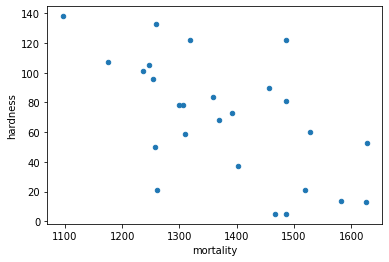

In [62]:
data_south = data[data['location'] == 'South']
data_south.plot(kind='scatter', x='mortality', y='hardness')

In [70]:
# Коэффициент коррелиции Пирсона. Коэф. корреляции снизился незначительно
data_south[['mortality','hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [72]:
data_south[['mortality','hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


k=  [-0.15270282]
b=  282.21082547253417
коэффициент детерминации=  0.4240282745996041


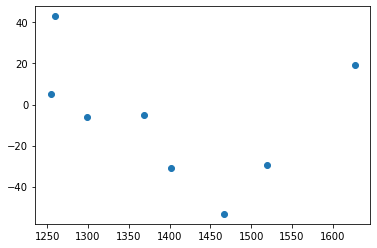

In [79]:
x_south = data_south[['mortality']]
y_south = data_south['hardness']

x_south_train, x_south_test, y_south_train, y_south_test = train_test_split(x_south,y_south, test_size=0.3,random_state=10)

model_south = LinearRegression()
model_south.fit(x_south_train, y_south_train)

# коэффициенты уравнения линейной регрессии y=kx+b
print('k= ',model_south.coef_)
print('b= ',model_south.intercept_)

# коэффициент детерминации= ',
print('коэффициент детерминации= ',model_south.score(x_south_test, y_south_test))

y_south_pred = model_south.predict(x_south_test)

plt.scatter(x=x_south_test, y=y_south_test-y_south_pred)

коэффициент детерминации получился больше, чем в в модели без разделения. Тем не менее он все равно низкий. Остатки больше выглядят как случайные

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

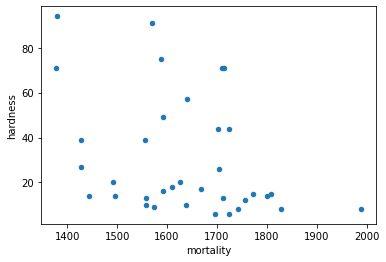

In [74]:
data_north = data[data['location'] == 'North']
data_north.plot(kind='scatter', x='mortality', y='hardness')

In [75]:
# Коэффициент корреляции Пирсона. Коэф. корреляции значительно снизился по сравнению с неразделенной совокуплностью
data_north[['mortality','hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [76]:
data_north[['mortality','hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


k=  [-0.08436687]
b=  172.66099624048283
коэффициент детерминации=  -0.4102293865236861


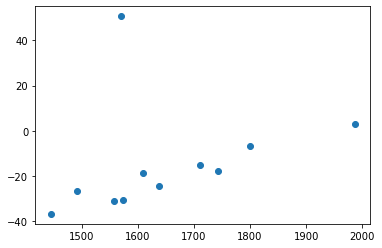

In [81]:
x_north = data_north[['mortality']]
y_north = data_north['hardness']

x_north_train, x_north_test, y_north_train, y_north_test = train_test_split(x_north,y_north, test_size=0.3,random_state=10)

model_north = LinearRegression()
model_north.fit(x_north_train, y_north_train)

# коэффициенты уравнения линейной регрессии y=kx+b
print('k= ',model_north.coef_)
print('b= ',model_north.intercept_)

# коэффициент детерминации= ',
print('коэффициент детерминации= ',model_south.score(x_north_test, y_north_test))

y_north_pred = model_north.predict(x_north_test)

plt.scatter(x=x_north_test, y=y_north_test-y_north_pred)

остатки точно носят не случайный характер

Получается что на юге зависимость сохраняется. При этом рассчитанная модель лучше описывает выборку. На севере зависимость очень слабая

Скажите, пожалуйста, если получаются такие остатки, то что надо делать? искать лучше модель?  Или, т.к. коэф коррелиции низкий, не надо  и пытаться строить регрессию, хорошей модели все равно не получится?